In [1]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import scipy.interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path
from scipy.optimize import curve_fit
import scipy.interpolate
import pandas as pd


def irrep_list_maker(energy_file):
    df = pd.read_csv(energy_file,delim_whitespace=True, header=None)
    dflist = df.values.tolist()
    irrep_list = []
    for i in range(len(dflist)):
        irrep = dflist[i][1]
    
        if len(irrep_list)==0:
            irrep_list.append(irrep)
        else:
            check_irrep_list_flag = 0
            for j in range(len(irrep_list)):
                temp_irrep = irrep_list[j]
            
                if(temp_irrep == irrep):
                    check_irrep_list_flag = 1
                    break 
            if(check_irrep_list_flag==0):
                irrep_list.append(irrep)

    return dflist, irrep_list 

def irrep_energy_list_maker(full_energy_list, fixed_irrep):
    Ecm_list = []
    Elat_list = []

    for i in range(len(full_energy_list)):
        if(full_energy_list[i][1]==fixed_irrep):
            Ecm_list.append(float(full_energy_list[i][2]))
            Elat_list.append(float(full_energy_list[i][3]))

    return Ecm_list, Elat_list 

def energy_list_maker_fixedmom(full_energy_list, fixed_mom):
    Ecm_list = []
    Elat_list = []


    for i in range(len(full_energy_list)):
        if(full_energy_list[i][1][0]==fixed_mom[0] and full_energy_list[i][1][1]==fixed_mom[1] and full_energy_list[i][1][2]==fixed_mom[2]):
            Ecm_list.append(float(full_energy_list[i][2]))
            Elat_list.append(float(full_energy_list[i][3]))

    return Ecm_list, Elat_list 



This section is for testing $F_2$ for identical particles

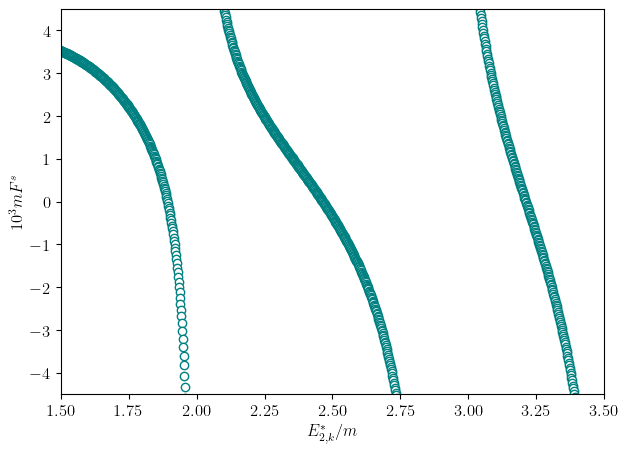

In [2]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "F2_i1_test.dat"
k2file = "K2file.dat"
(E2star, ReF, ImF) = np.genfromtxt(filename, unpack=True)
(E2, ReK, ImK) = np.genfromtxt(k2file,unpack=True)
fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlim(1.5,3.5)
ax.set_ylim(-4.5,4.5)
ax.set_ylabel("$10^3 m F^s$")
ax.set_xlabel("$E_{2,k}^*/m$")
#print(ReF,ImF,E2star)
L = 6

ax.scatter(E2star, 0.5*ReF*(10**3)*L*L*L, marker='o', edgecolor="teal", facecolor='white')
#ax.plot(E2,10**3*ReK,color='black')
plt.draw()

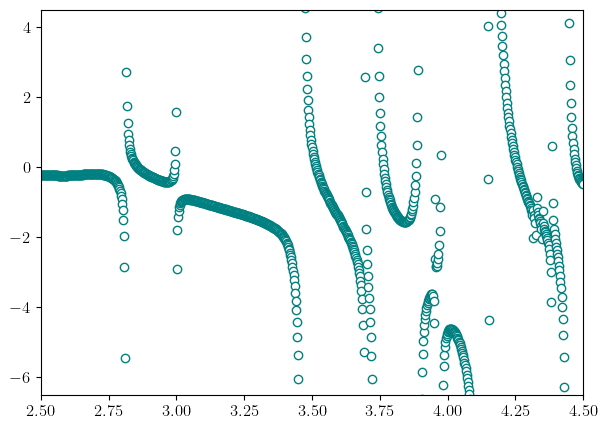

In [3]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "F3_ID_test.dat"

(En, ReQC3, ImQC3) = np.genfromtxt(filename, unpack=True)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlim(2.5,4.5)
ax.set_ylim(-6.5,4.5)

L = 6

ax.scatter(En, ReQC3*10**4, marker='o', edgecolor="teal", facecolor='white')
plt.draw()

In [4]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "F3_ID_test_1.dat"
raulF3file = "F3iso_data_from_Rauls_code"

(En, ReQC3, ImQC3) = np.genfromtxt(filename, unpack=True)
(En1, ReF3) = np.genfromtxt(raulF3file,unpack=True)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlabel("$E_3/m$", fontsize=25)
ax.set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
ax.set_xlim(2.5,4.5)
ax.set_ylim(-2.5,2.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

L = 6

ax.scatter(En, ReQC3*10**4, marker='o', edgecolor="teal", facecolor='white',zorder=5, label="non-degenerate mass code")
ax.scatter(En1+0.03, ReF3*10**4, marker='s', edgecolor="red", facecolor='white',zorder=3, label="degenerate mass code")
ax.legend()
fig.tight_layout()
#plt.draw()
outputfile_str = "F3_ID_test_1.pdf"
plt.savefig(outputfile_str)
plt.close()

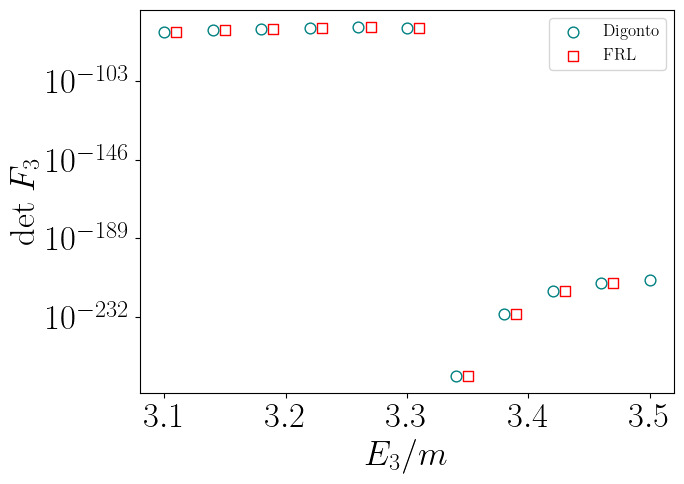

In [11]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "det_F3_test_L6.dat"
raulF3file = "detF3_test_FRL"

(En, detF3) = np.genfromtxt(filename, unpack=True)
(En1, detF31) = np.genfromtxt(raulF3file,unpack=True)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlabel("$E_3/m$", fontsize=25)
ax.set_ylabel("det $F_{3}$",fontsize=25)
#ax.set_xlim(2.5,4.5)
#ax.set_ylim(-2.5,2.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_yscale('log')
L = 6

ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
ax.scatter(En1+0.01, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
ax.legend()
fig.tight_layout()
plt.draw()
outputfile_str = "det_F3_2+1_test.pdf"
#plt.savefig(outputfile_str)
#plt.close()

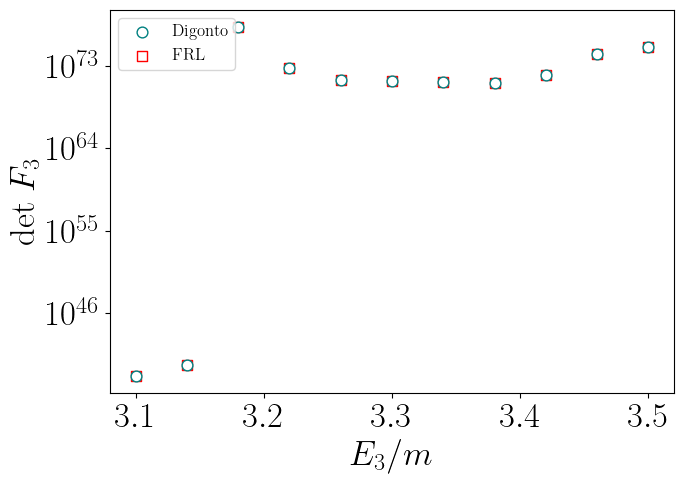

In [3]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "det_F3inv_test_L5.dat"
raulF3file = "detF3inv_test_FRL_L5"

(En, detF3) = np.genfromtxt(filename, unpack=True)
(En1, detF31) = np.genfromtxt(raulF3file,unpack=True)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlabel("$E_3/m$", fontsize=25)
ax.set_ylabel("det $F_{3}$",fontsize=25)
#ax.set_xlim(2.5,4.5)
#ax.set_ylim(-2.5,2.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_yscale('log')
L = 6

ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
ax.legend()
fig.tight_layout()
plt.draw()
outputfile_str = "det_F3_2+1_test.pdf"
#plt.savefig(outputfile_str)
#plt.close()

In [16]:
#This plots q^2 and sig_p^2 for different Ecm and P 

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "qsq_test_P000"
filename2 = "qsq_test_P100"
filename3 = "qsq_test_P110"
filename4 = "qsq_test_P111"
filename5 = "qsq_test_P200"

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(7,25))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, Resigp, Imsigp, 
     Reqsq, Imqsq, Recutoff, Imcutoff, 
     Recheckzero1, Imcheckzero1,Recheckzero2,
     Imcheckzero2, threshold) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax.set_xlim(2.5,4.5)
    ax[counter].set_ylim(-2.5,2.5)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,Resigp, linewidth=3, label="$\sigma_p$")
    ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    counter=counter+1
    ax[4].set_xlabel("$E_{cm}$", fontsize=25)
    plt.draw()

outputfile_str = "qsq_test_m1_1_m2_0.5.pdf"
plt.savefig(outputfile_str)
plt.close()

file loaded =  qsq_test_P000
file loaded =  qsq_test_P100
file loaded =  qsq_test_P110
file loaded =  qsq_test_P111
file loaded =  qsq_test_P200


In [4]:
#This plots q^2 and sig_p^2 for different Ecm and P, the masses are KKpi

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "qsq_test_KKpi_P000"
filename2 = "qsq_test_KKpi_P100"
filename3 = "qsq_test_KKpi_P110"
filename4 = "qsq_test_KKpi_P111"
filename5 = "qsq_test_KKpi_P200"

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(7,25))
counter = 0
fig.suptitle("Two-body sub-system, $\pi K$", fontsize=20)
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, Resigp, Imsigp, 
     Reqsq, Imqsq, Recutoff, Imcutoff, 
     Recheckzero1, Imcheckzero1,Recheckzero2,
     Imcheckzero2, threshold) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[counter].set_ylim(-0.05,0.05)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,Resigp, linewidth=3, label="$\sigma_p$")
    ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    counter=counter+1
    ax[4].set_xlabel("$E_{cm}$", fontsize=25)
    plt.draw()

outputfile_str = "qsq_test_KKpi_2body_piK.pdf"
plt.savefig(outputfile_str)
plt.close()

file loaded =  qsq_test_KKpi_P000
file loaded =  qsq_test_KKpi_P100
file loaded =  qsq_test_KKpi_P110
file loaded =  qsq_test_KKpi_P111
file loaded =  qsq_test_KKpi_P200


In [3]:
#This plots q^2 and sig_p^2 for different Ecm and P, the masses are KKpi

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "qsq_test_KKpi_2body_KK_P000"
filename2 = "qsq_test_KKpi_2body_KK_P100"
filename3 = "qsq_test_KKpi_2body_KK_P110"
filename4 = "qsq_test_KKpi_2body_KK_P111"
filename5 = "qsq_test_KKpi_2body_KK_P200"

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(7,25))
counter = 0
fig.suptitle("Two-body sub-system, $\pi K$", fontsize=20)
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, Resigp, Imsigp, 
     Reqsq, Imqsq, Recutoff, Imcutoff, 
     Recheckzero1, Imcheckzero1,Recheckzero2,
     Imcheckzero2, threshold) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[counter].set_ylim(-0.05,0.05)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,Resigp, linewidth=3, label="$\sigma_p$")
    ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    counter=counter+1
    ax[4].set_xlabel("$E_{cm}$", fontsize=25)
    plt.draw()

outputfile_str = "qsq_test_KKpi_2body_KK.pdf"
plt.savefig(outputfile_str)
plt.close()

file loaded =  qsq_test_KKpi_2body_KK_P000
file loaded =  qsq_test_KKpi_2body_KK_P100
file loaded =  qsq_test_KKpi_2body_KK_P110
file loaded =  qsq_test_KKpi_2body_KK_P111
file loaded =  qsq_test_KKpi_2body_KK_P200


In [6]:
#This plots K3_iso for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "det_F3inv_KKpi_L20_nP_000.dat"
filename2 = "det_F3inv_KKpi_L20_nP_100.dat"
filename3 = "det_F3inv_KKpi_L20_nP_110.dat"
filename4 = "det_F3inv_KKpi_L20_nP_111.dat"
filename5 = "det_F3inv_KKpi_L20_nP_200.dat"

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, K3df) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax.set_ylim(-1E7,1E7)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    #ax[counter].set_title(titlestring)
    ax.plot(EcmR,K3df, linewidth=3, label=titlestring)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax.axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax.legend()
    fig.tight_layout()
    counter=counter+1
    ax.set_xlabel("$E_{cm}$", fontsize=25)
    ax.set_ylabel("$\mathcal{K}_{3,iso}$",fontsize=25)
    plt.draw()

outputfile_str = "K3df_KKpi_test.pdf"
plt.savefig(outputfile_str)
plt.close()

file loaded =  det_F3inv_KKpi_L20_nP_000.dat
file loaded =  det_F3inv_KKpi_L20_nP_100.dat
file loaded =  det_F3inv_KKpi_L20_nP_110.dat
file loaded =  det_F3inv_KKpi_L20_nP_111.dat
file loaded =  det_F3inv_KKpi_L20_nP_200.dat


file loaded =  F2_vs_sigp_2body_piK_P000_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_piK_P100_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_piK_P110_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_piK_P111_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_piK_P200_En_2.900000.dat


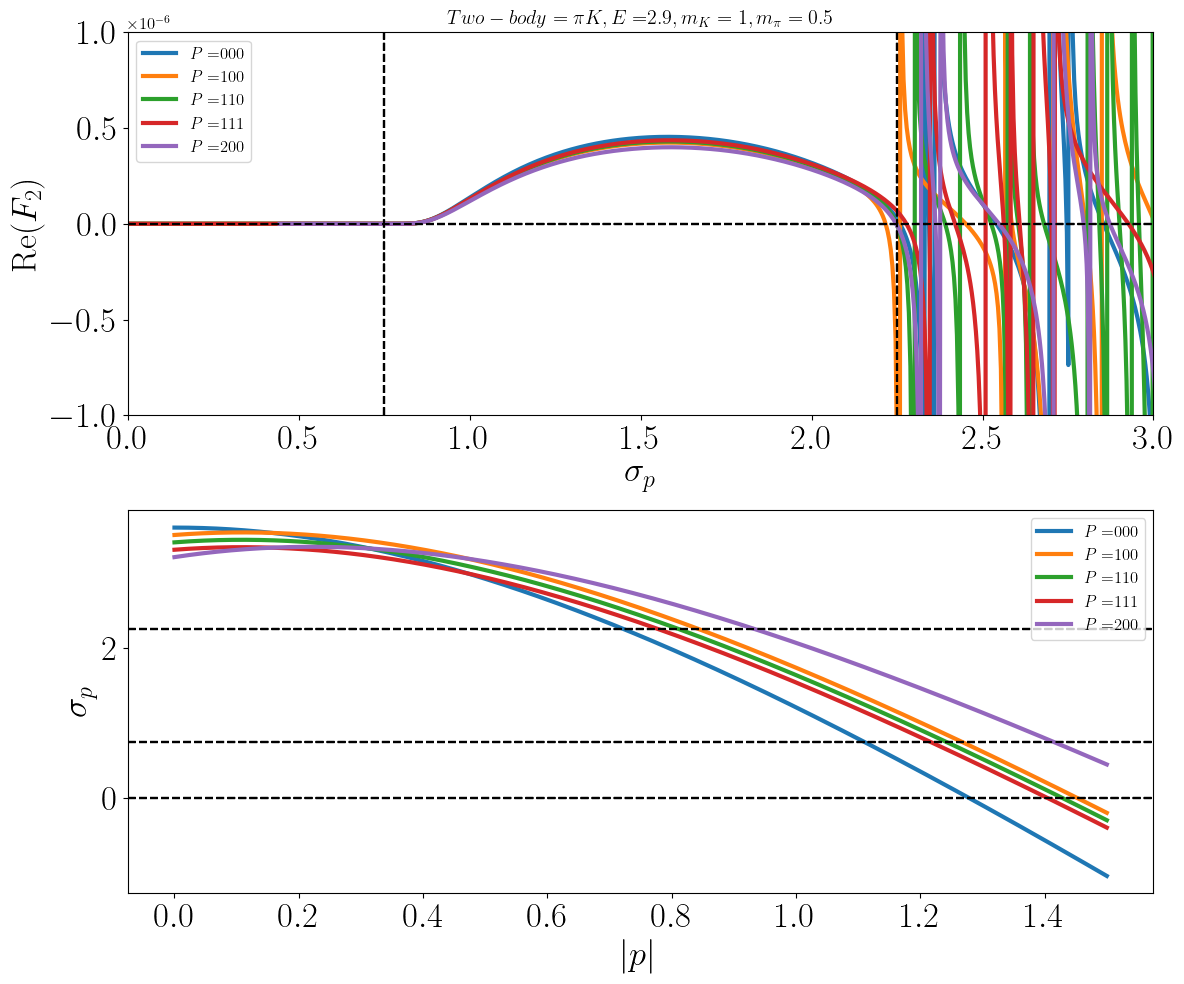

In [8]:
#This plots F2 for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_vs_sigp_2body_piK_P000_En_2.900000.dat"
filename2 = "F2_vs_sigp_2body_piK_P100_En_2.900000.dat"
filename3 = "F2_vs_sigp_2body_piK_P110_En_2.900000.dat"
filename4 = "F2_vs_sigp_2body_piK_P111_En_2.900000.dat"
filename5 = "F2_vs_sigp_2body_piK_P200_En_2.900000.dat"

#filelist = [filename1]
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, ind, nsq, tcut, twobody_threshold, re_spec_p, im_spec_p, 
     re_sigp, im_sigp, reF2, imF2) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[0].set_xlim(0,3)
    ax[0].set_ylim(-1E-6,1E-6)
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax[1].set_xlim(0,3)
    #ax[1].set_ylim(-1E-6,1E-6)
    ax[1].tick_params(axis='both', which='major', labelsize=25)
    ax[1].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[0].set_title("$Two-body = \pi K, E = $" + str(En[0])+ "$, m_K = 1, m_\pi = 0.5$")
    ax[0].plot(re_sigp,reF2, linewidth=3, label=titlestring)
    ax[1].plot(re_spec_p,re_sigp, linewidth=3, label=titlestring)
    
    #ax.scatter(re_sigp, reF2, marker='o', s=60,zorder=5, label=titlestring)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[0].axhline(y=0,linestyle='--',color='black')
    ax[0].axvline(x=tcut[0],linestyle='--',color='black')
    ax[0].axvline(x=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    ax[1].axhline(y=0,linestyle='--',color='black')
    ax[1].axhline(y=tcut[0],linestyle='--',color='black')
    ax[1].axhline(y=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    ax[0].set_xlabel("$\sigma_{p}$", fontsize=25)
    ax[0].set_ylabel("Re($F_{2}$)",fontsize=25)
    ax[1].set_ylabel("$\sigma_p$",fontsize=25)
    ax[1].set_xlabel("$|p|$", fontsize=25)
    
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    counter=counter+1
    
    plt.draw()

outputfile_str = "F2_2body_piK" + str(En[0]) + "_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F2_vs_sigp_2body_KK_P000_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_KK_P100_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_KK_P110_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_KK_P111_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_KK_P200_En_2.900000.dat


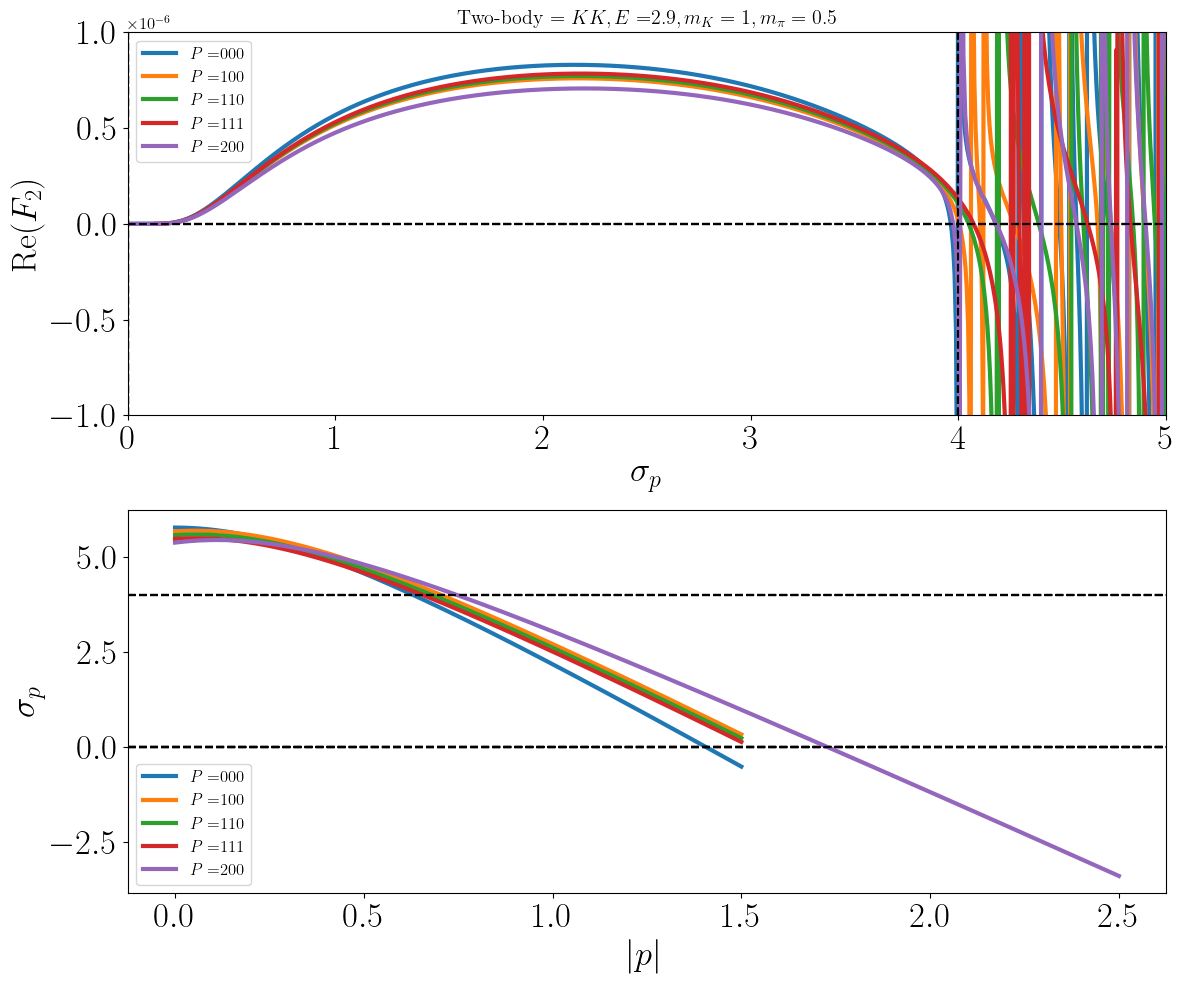

In [6]:
#This plots F2 for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_vs_sigp_2body_KK_P000_En_2.900000.dat"
filename2 = "F2_vs_sigp_2body_KK_P100_En_2.900000.dat"
filename3 = "F2_vs_sigp_2body_KK_P110_En_2.900000.dat"
filename4 = "F2_vs_sigp_2body_KK_P111_En_2.900000.dat"
filename5 = "F2_vs_sigp_2body_KK_P200_En_2.900000.dat"

#filelist = [filename1]
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, ind, nsq, tcut, twobody_threshold, re_spec_p, im_spec_p, 
     re_sigp, im_sigp, reF2, imF2) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[0].set_xlim(0,5)
    ax[0].set_ylim(-1E-6,1E-6)
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax[1].set_xlim(0,5)
    #ax[1].set_ylim(-1E-9,1E-9)
    ax[1].tick_params(axis='both', which='major', labelsize=25)
    ax[1].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[0].set_title("Two-body $= K K, E = $" + str(En[0]) + "$, m_K = 1, m_\pi = 0.5$")
    ax[0].plot(re_sigp,reF2, linewidth=3, label=titlestring)
    ax[1].plot(re_spec_p,re_sigp, linewidth=3, label=titlestring)
    
    #ax.scatter(re_sigp, reF2, marker='o', s=60,zorder=5, label=titlestring)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[0].axhline(y=0,linestyle='--',color='black')
    ax[0].axvline(x=tcut[0],linestyle='--',color='black')
    ax[0].axvline(x=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    ax[1].axhline(y=0,linestyle='--',color='black')
    ax[1].axhline(y=tcut[0],linestyle='--',color='black')
    ax[1].axhline(y=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    ax[0].set_xlabel("$\sigma_{p}$", fontsize=25)
    ax[0].set_ylabel("Re($F_{2}$)",fontsize=25)
    ax[1].set_ylabel("$\sigma_p$",fontsize=25)
    ax[1].set_xlabel("$|p|$", fontsize=25)
    
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    counter=counter+1
    
    plt.draw()

outputfile_str = "F2_2body_KK" + str(En[0]) + "_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F2_vs_sigp_KKpi_2body_KK_P000_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_KK_P100_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_KK_P110_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_KK_P111_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_KK_P200_Ecm_0.338020.dat


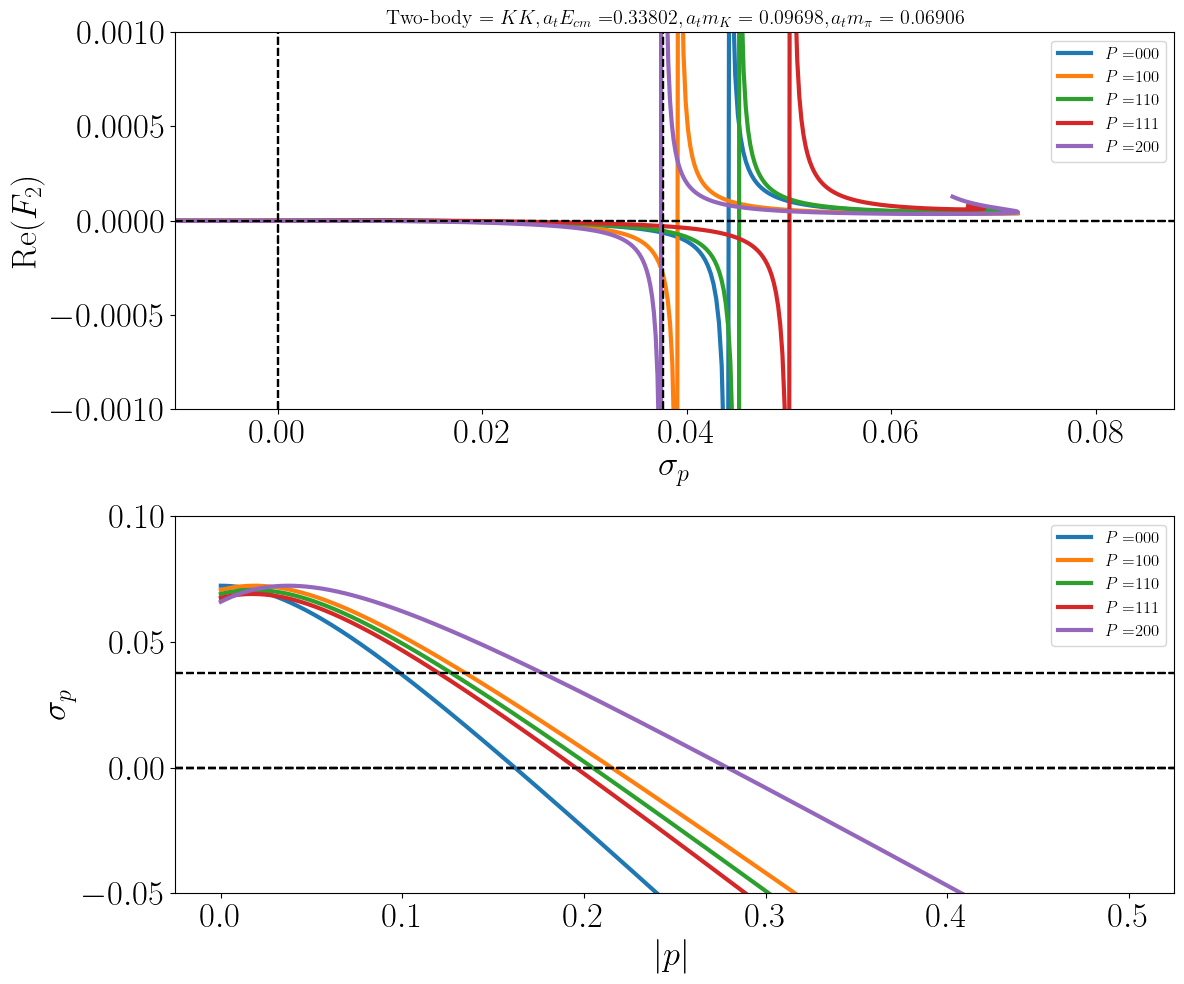

In [10]:
#This plots F2 for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_vs_sigp_KKpi_2body_KK_P000_Ecm_0.338020.dat"
filename2 = "F2_vs_sigp_KKpi_2body_KK_P100_Ecm_0.338020.dat"
filename3 = "F2_vs_sigp_KKpi_2body_KK_P110_Ecm_0.338020.dat"
filename4 = "F2_vs_sigp_KKpi_2body_KK_P111_Ecm_0.338020.dat"
filename5 = "F2_vs_sigp_KKpi_2body_KK_P200_Ecm_0.338020.dat"

#filelist = [filename1,filename2,filename3]
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, Ecm, ind, nsq, tcut, twobody_threshold, re_spec_p, im_spec_p, 
     re_sigp, im_sigp, reF2, imF2) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[0].set_xlim(-0.01,twobody_threshold[0]*twobody_threshold[0]+0.05)
    ax[0].set_ylim(-1E-3,1E-3)
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax[1].set_xlim(-0.01,twobody_threshold[0]*twobody_threshold[0]+0.05)
    ax[1].set_ylim(-0.05,0.1)
    ax[1].tick_params(axis='both', which='major', labelsize=25)
    ax[1].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[0].set_title("Two-body $= K K, a_t E_{cm} = $" + str(Ecm[0]) + "$, a_t m_K = 0.09698, a_t m_\pi = 0.06906$")
    ax[0].plot(re_sigp,reF2, linewidth=3, label=titlestring)
    #ax[1].plot(re_sigp,imF2, linewidth=3, label=titlestring)
    ax[1].plot(re_spec_p,re_sigp, linewidth=3, label=titlestring)
    
    #ax.scatter(re_sigp, reF2, marker='o', s=60,zorder=5, label=titlestring)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[0].axhline(y=0,linestyle='--',color='black')
    ax[0].axvline(x=tcut[0],linestyle='--',color='black')
    ax[0].axvline(x=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    ax[1].axhline(y=0,linestyle='--',color='black')
    ax[1].axhline(y=tcut[0],linestyle='--',color='black')
    ax[1].axhline(y=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    ax[0].set_xlabel("$\sigma_{p}$", fontsize=25)
    ax[0].set_ylabel("Re($F_{2}$)",fontsize=25)
    ax[1].set_ylabel("$\sigma_p$",fontsize=25)
    ax[1].set_xlabel("$|p|$", fontsize=25)
    
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    counter=counter+1
    
    plt.draw()

outputfile_str = "F2_KKpi_2body_KK" + str(Ecm[0]) + "_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F2_vs_sigp_KKpi_2body_piK_P000_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_piK_P100_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_piK_P110_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_piK_P111_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_piK_P200_Ecm_0.338020.dat


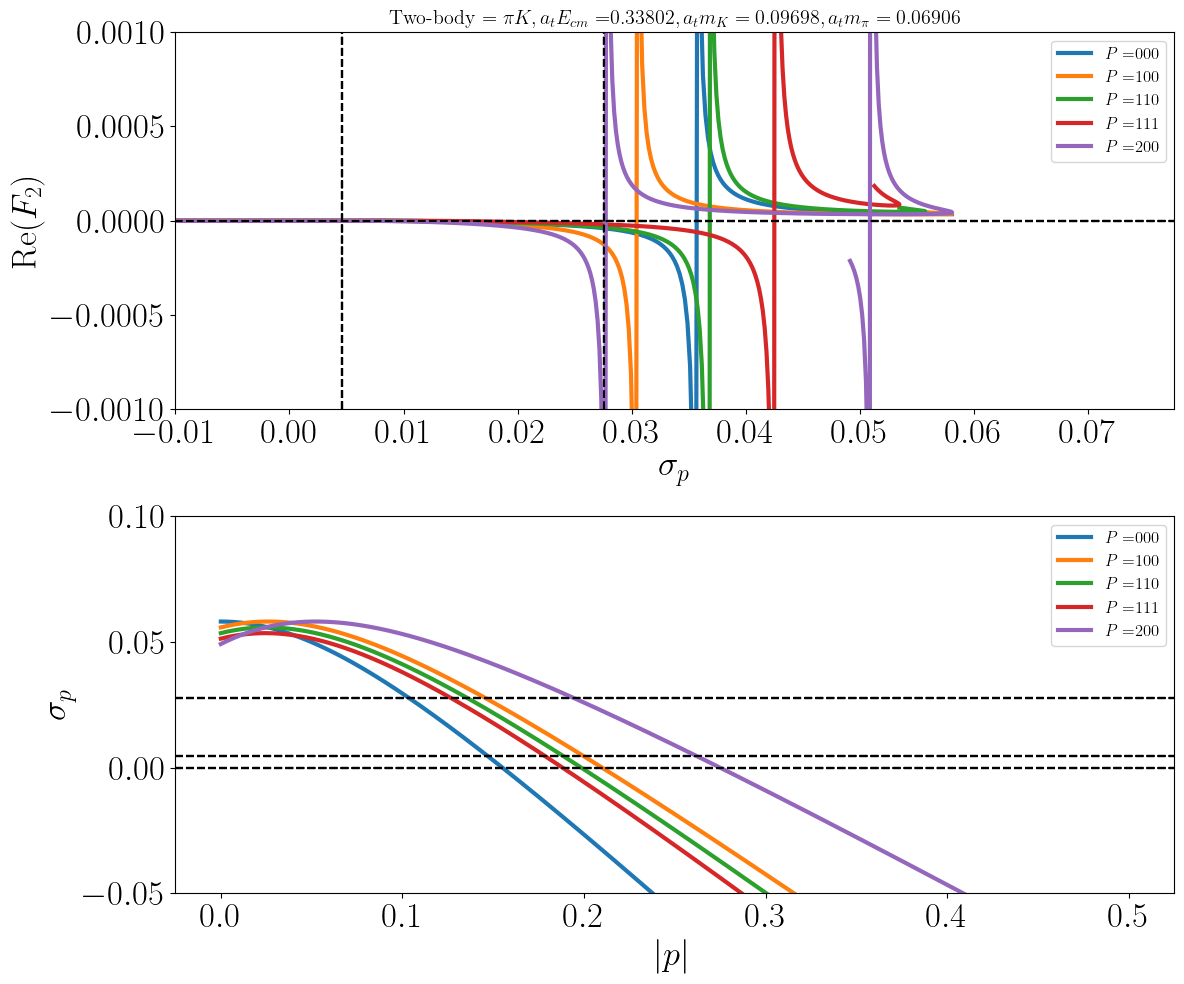

In [12]:
#This plots F2 for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_vs_sigp_KKpi_2body_piK_P000_Ecm_0.338020.dat"
filename2 = "F2_vs_sigp_KKpi_2body_piK_P100_Ecm_0.338020.dat"
filename3 = "F2_vs_sigp_KKpi_2body_piK_P110_Ecm_0.338020.dat"
filename4 = "F2_vs_sigp_KKpi_2body_piK_P111_Ecm_0.338020.dat"
filename5 = "F2_vs_sigp_KKpi_2body_piK_P200_Ecm_0.338020.dat"

#filelist = [filename1,filename2,filename3]
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, Ecm, ind, nsq, tcut, twobody_threshold, re_spec_p, im_spec_p, 
     re_sigp, im_sigp, reF2, imF2) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[0].set_xlim(-0.01,twobody_threshold[0]*twobody_threshold[0]+0.05)
    ax[0].set_ylim(-1E-3,1E-3)
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax[1].set_xlim(-0.01,twobody_threshold[0]*twobody_threshold[0]+0.05)
    ax[1].set_ylim(-0.05,0.1)
    ax[1].tick_params(axis='both', which='major', labelsize=25)
    ax[1].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[0].set_title("Two-body $= \pi K, a_t E_{cm} = $" + str(Ecm[0]) + "$, a_t m_K = 0.09698, a_t m_\pi = 0.06906$")
    ax[0].plot(re_sigp,reF2, linewidth=3, label=titlestring)
    #ax[1].plot(re_sigp,imF2, linewidth=3, label=titlestring)
    ax[1].plot(re_spec_p,re_sigp, linewidth=3, label=titlestring)
    
    #ax.scatter(re_sigp, reF2, marker='o', s=60,zorder=5, label=titlestring)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[0].axhline(y=0,linestyle='--',color='black')
    ax[0].axvline(x=tcut[0],linestyle='--',color='black')
    ax[0].axvline(x=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    ax[1].axhline(y=0,linestyle='--',color='black')
    ax[1].axhline(y=tcut[0],linestyle='--',color='black')
    ax[1].axhline(y=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    ax[0].set_xlabel("$\sigma_{p}$", fontsize=25)
    ax[0].set_ylabel("Re($F_{2}$)",fontsize=25)
    ax[1].set_ylabel("$\sigma_p$",fontsize=25)
    ax[1].set_xlabel("$|p|$", fontsize=25)
    
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    counter=counter+1
    
    plt.draw()

outputfile_str = "F2_KKpi_2body_piK" + str(Ecm[0]) + "_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F3_KKpi_L20_nP_000.dat
file loaded =  F3_KKpi_L20_nP_100.dat
file loaded =  F3_KKpi_L20_nP_110.dat
file loaded =  F3_KKpi_L20_nP_111.dat
file loaded =  F3_KKpi_L20_nP_200.dat


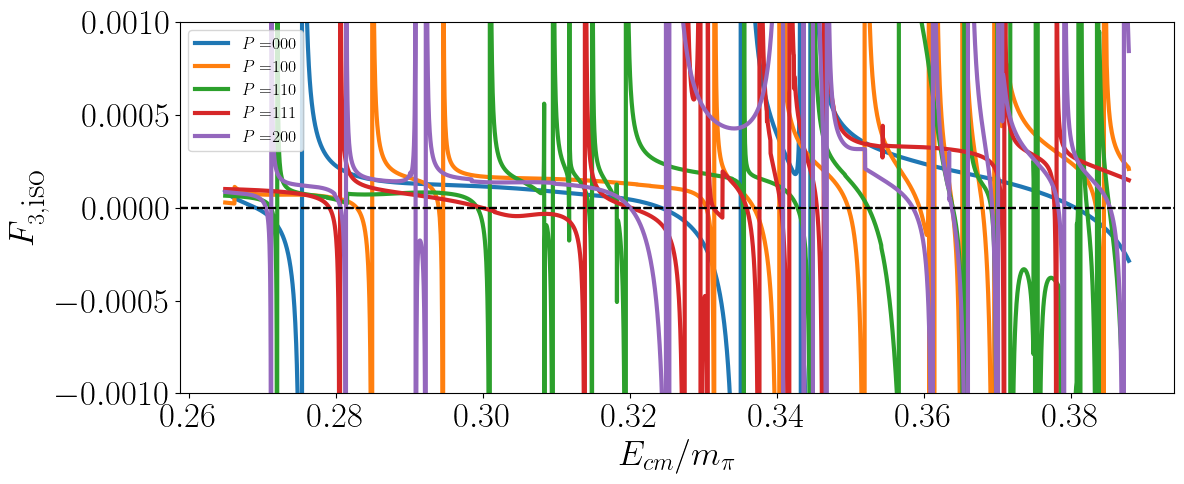

In [14]:
#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax.set_ylim(-1E-3,1E-3)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    #ax[counter].set_title(titlestring)
    ax.plot(EcmR,F3iso, linewidth=3, label=titlestring)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax.axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax.legend()
    fig.tight_layout()
    counter=counter+1
    ax.set_xlabel("$E_{cm}/m_\pi$", fontsize=25)
    ax.set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()

outputfile_str = "F3iso_KKpi_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F2_sum_test_P100.dat


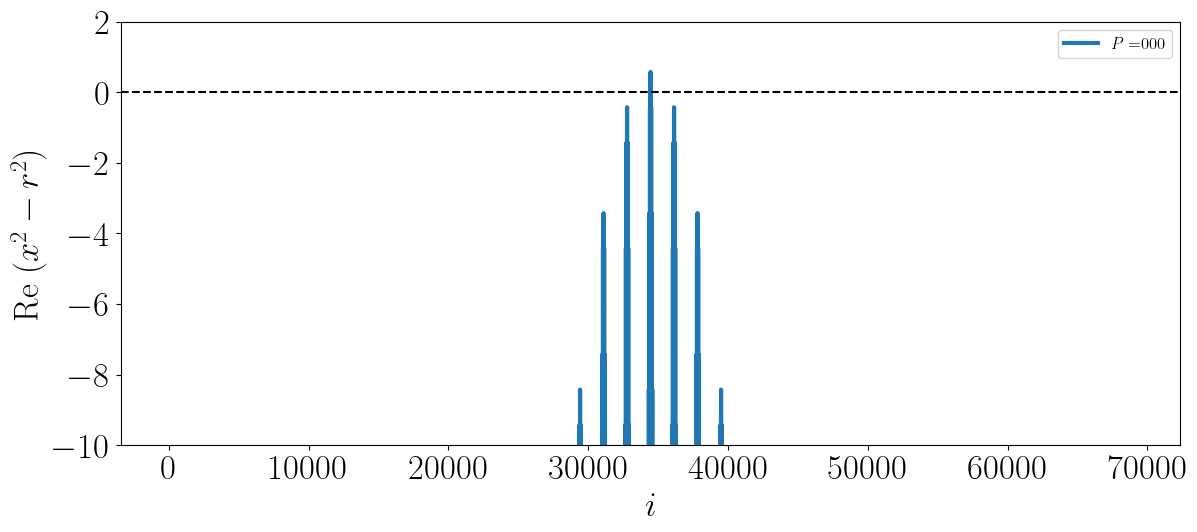

In [10]:
#This plots x^2-r^2 (found inside F2 sum) for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_sum_test_P100.dat"
filename2 = "F2_sum_test_P100.dat"
filename3 = "F2_sum_test_P100.dat"
filename4 = "F2_sum_test_P100.dat"
filename5 = "F2_sum_test_P100.dat"

atmpi = 0.06906

#filelist = [filename1, filename2, filename3, filename4, filename5]
filelist = [filename1]

titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (countr, nasq, rexsq, imxsq, rersq, 
     imrsq, rexsqrsq, imxsqrsq) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax.set_xlim(3.75E6,4.50E6)
    ax.set_ylim(-10,2)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    #ax[counter].set_title(titlestring)
    ax.plot(countr,rexsqrsq, linewidth=3, label=titlestring)
    #ax.plot(countr,nasq, linewidth=3, label="$n^2$")
    #ax.plot(countr,rersq, linewidth=3, label="$r^2$")
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax.axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax.legend()
    fig.tight_layout()
    counter=counter+1
    ax.set_xlabel("$i$", fontsize=25)
    ax.set_ylabel("Re $(x^2-r^2)$",fontsize=25)
    plt.draw()

outputfile_str = "F2_sum_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F3_KKpi_L20_nP_000.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_100.dat
E size =  18
file loaded =  F3_KKpi_L20_nP_110.dat
E size =  9
file loaded =  F3_KKpi_L20_nP_111.dat
E size =  10
file loaded =  F3_KKpi_L20_nP_200.dat
E size =  15
0


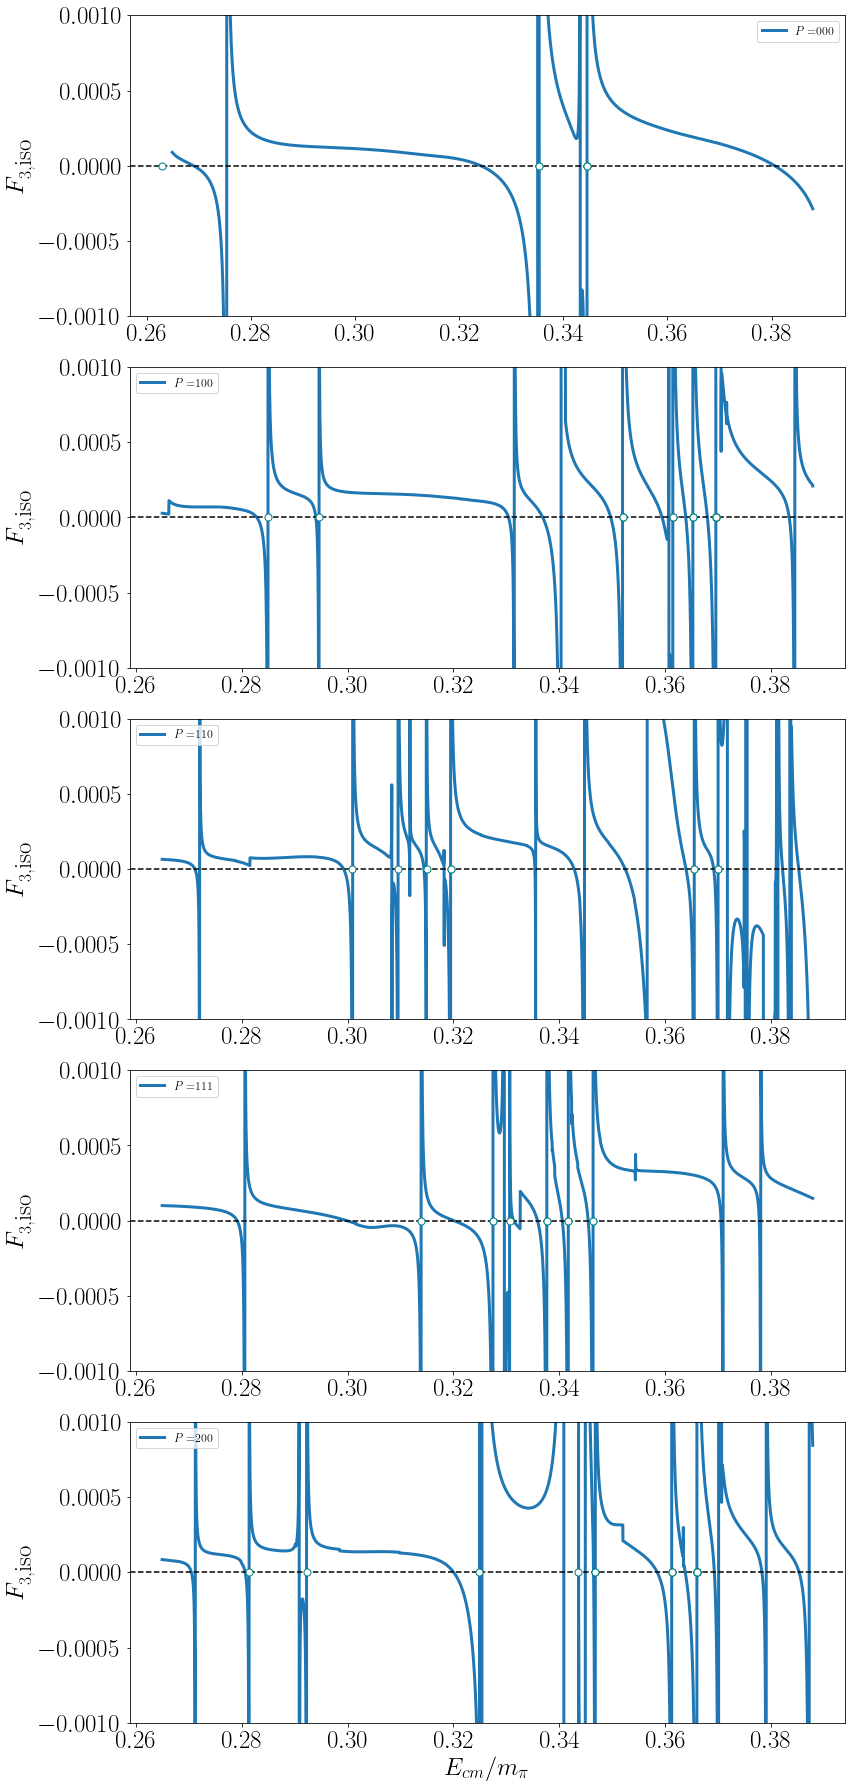

In [19]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from redstar (S2I2.energies)

#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]

for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)


    #non_int_energies_ecm, non_int_energies_elab = irrep_energy_list_maker(full_energy_list, selected_irrep_list[counter])
    non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])
    
    print("E size = ",len(non_int_energies_ecm))
    zero_y_val = []
    for i in range(len(non_int_energies_ecm)):
        zero_y_val.append(0.0)
    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[counter].set_ylim(-1E-3,1E-3)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    #ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,F3iso, linewidth=3, label=titlestring)
    ax[counter].scatter(non_int_energies_ecm,zero_y_val, marker='o', s=50, edgecolor="teal", facecolor='white',zorder=5)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$E_{cm}/m_\pi$", fontsize=25)
    ax[counter].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F3iso_KKpi_test_freespectrum_comparison.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])

file loaded =  F3_KKpi_L20_nP_000.dat
E size =  3
file loaded =  F3_KKpi_L20_nP_100.dat
E size =  9
file loaded =  F3_KKpi_L20_nP_110.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_111.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_200.dat
E size =  8
0


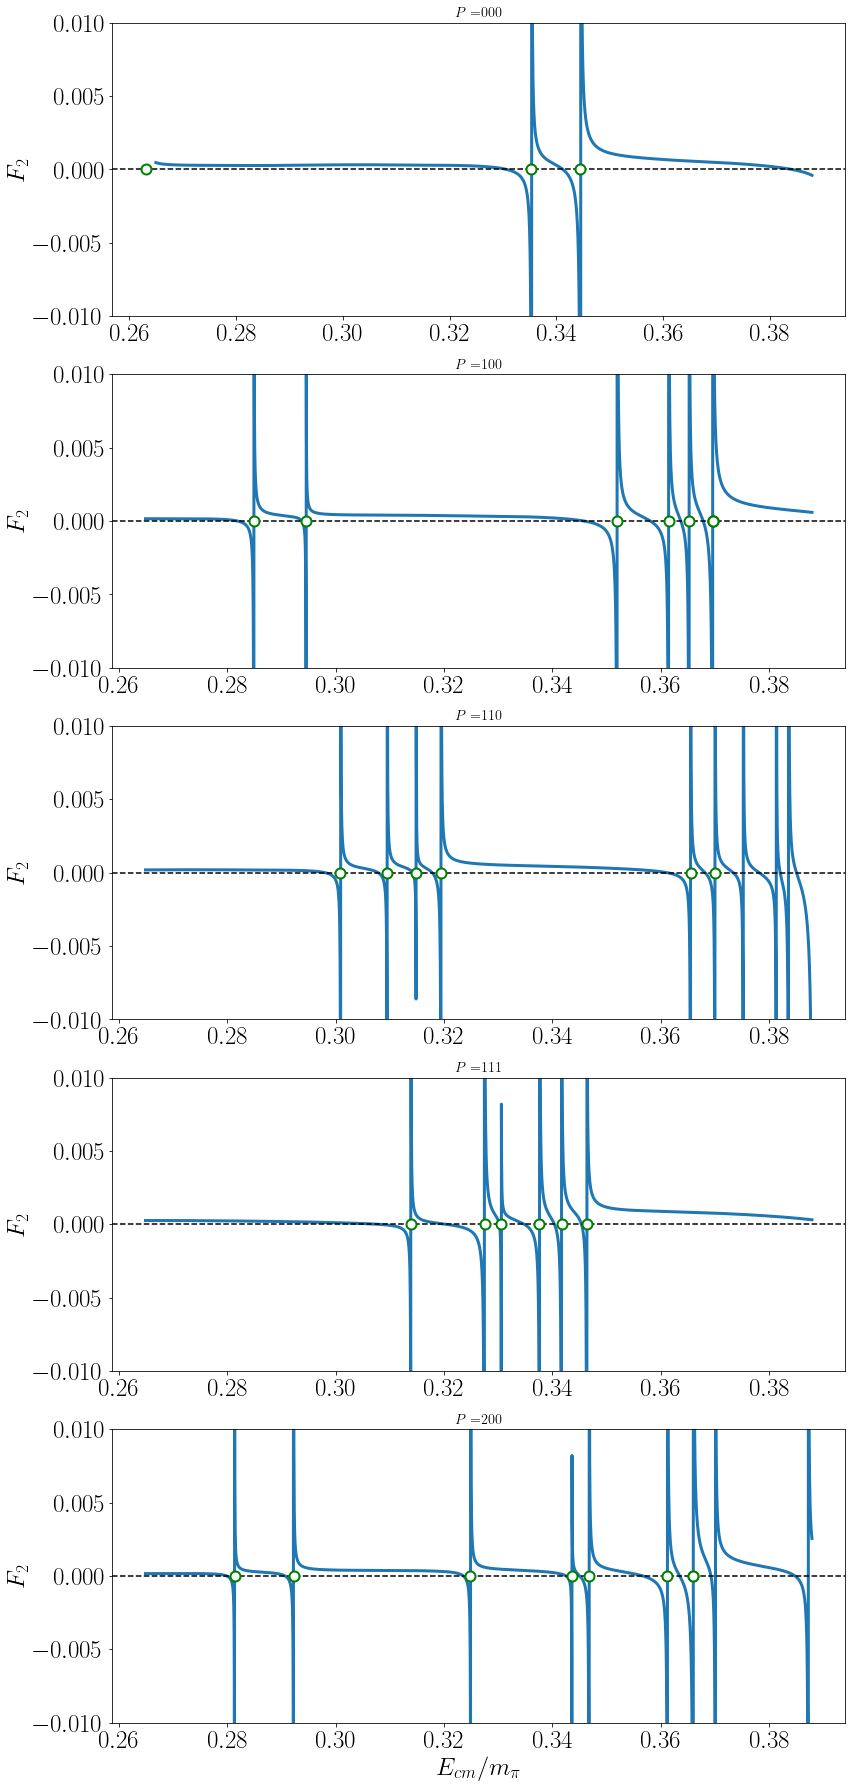

In [21]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from redstar (S2I2.energies)
# only A1m, A2 irrep is added for different boost P
# we also add the results of the denom 1 + (K2inv + G)F2inv to look for 
# the additional poles in F3

#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

additionalpolefile1 = "additional_poles2_F3_KKpi_L20_nP_000.dat"
additionalpolefile2 = "additional_poles2_F3_KKpi_L20_nP_100.dat"
additionalpolefile3 = "additional_poles2_F3_KKpi_L20_nP_110.dat"
additionalpolefile4 = "additional_poles2_F3_KKpi_L20_nP_111.dat"
additionalpolefile5 = "additional_poles2_F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [additionalpolefile1, additionalpolefile2, additionalpolefile3, additionalpolefile4, additionalpolefile5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]

for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)

    additionalpole_file = additionalpole_filelist[counter] 
    (En1, EcmR1, EcmI1, F21, F21sum, G1, G1sum, 
     K2i1, K2i1sum, F3det1, F3iso1) = np.genfromtxt(additionalpole_file, unpack=True)
    #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    non_int_energies_ecm, non_int_energies_elab = irrep_energy_list_maker(full_energy_list, selected_irrep_list[counter])
    #non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])
    print("E size = ",len(non_int_energies_ecm))
    
    zero_y_val = []
    for i in range(len(non_int_energies_ecm)):
        zero_y_val.append(0.0)
    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[counter].set_ylim(-1E-2,1E-2)
    #ax[counter].set_ylim(-1E-71,1E-71)
    #ax[counter].set_ylim(-500,500)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    #ax[counter].plot(EcmR,F3iso, linewidth=3, label=titlestring)
    ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1, linewidth=3, color='red', label=titlestring)
    ax[counter].scatter(non_int_energies_ecm,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    #ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$E_{cm}/m_\pi$", fontsize=25)
    ax[counter].set_ylabel("$F_{2}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F2_KKpi_test_freespectrum_comparison.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])

file loaded =  F3_KKpi_L20_nP_000.dat
E size =  3
file loaded =  F3_KKpi_L20_nP_100.dat
E size =  9
file loaded =  F3_KKpi_L20_nP_110.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_111.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_200.dat
E size =  8
0


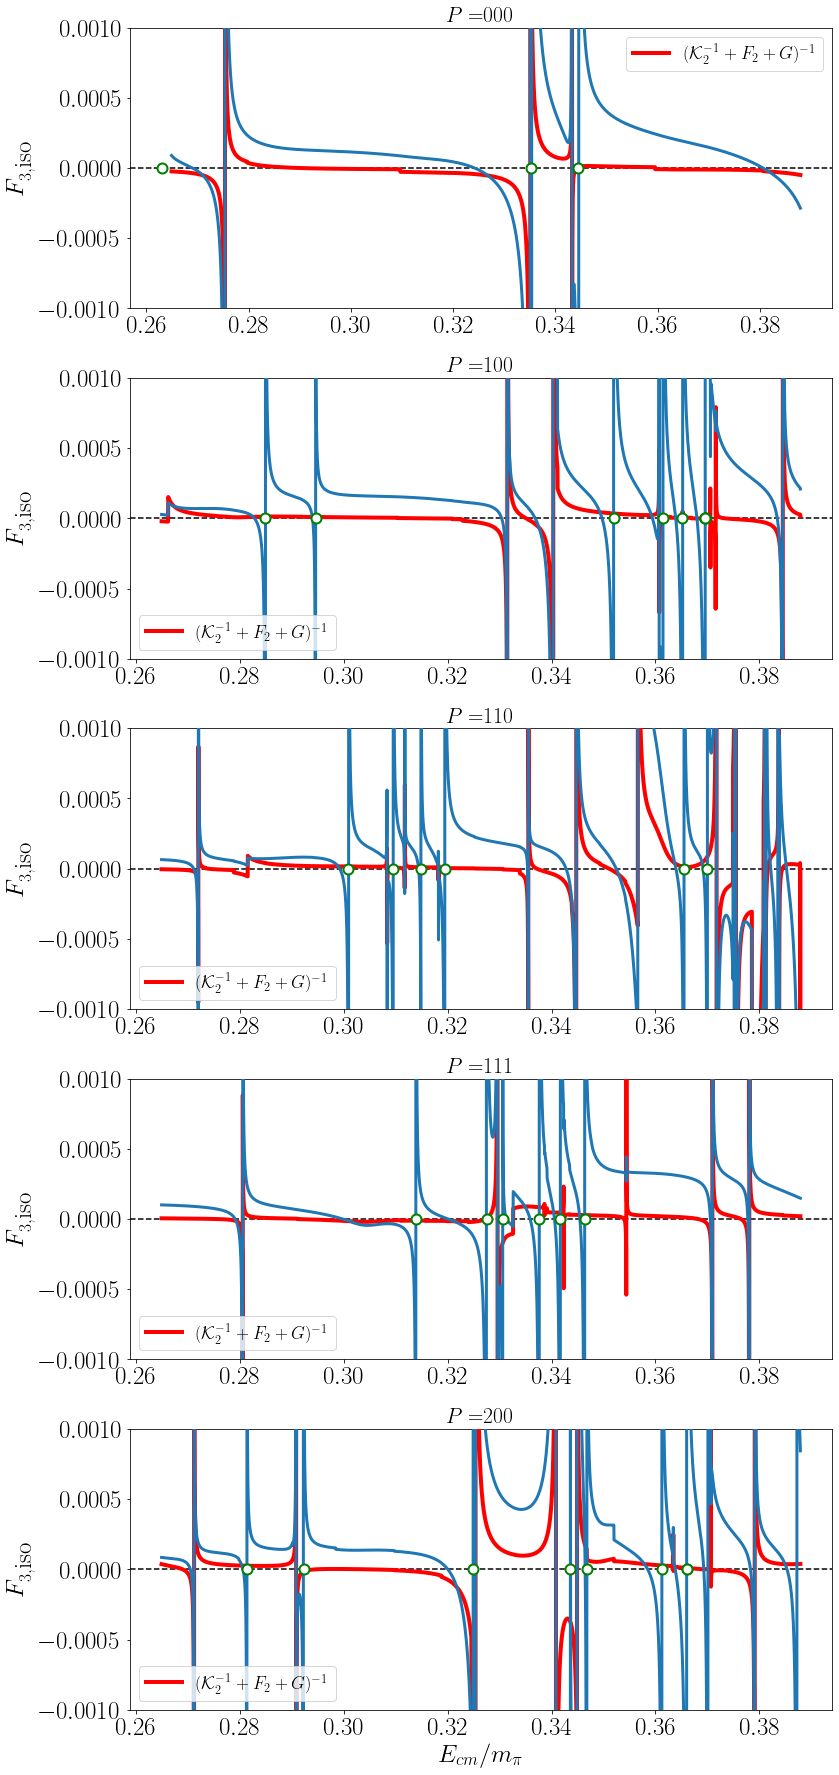

In [37]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from redstar (S2I2.energies)
# only A1m, A2 irrep is added for different boost P
# we also add the results of the denom 1 + (K2inv + G)F2inv to look for 
# the additional poles in F3

#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

additionalpolefile1 = "additional_poles3_F3_KKpi_L20_nP_000.dat"
additionalpolefile2 = "additional_poles3_F3_KKpi_L20_nP_100.dat"
additionalpolefile3 = "additional_poles3_F3_KKpi_L20_nP_110.dat"
additionalpolefile4 = "additional_poles3_F3_KKpi_L20_nP_111.dat"
additionalpolefile5 = "additional_poles3_F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [additionalpolefile1, additionalpolefile2, additionalpolefile3, additionalpolefile4, additionalpolefile5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]

for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)

    additionalpole_file = additionalpole_filelist[counter] 
    (En1, EcmR1, EcmI1, F21, F21sum, G1, G1sum, 
     K2i1, K2i1sum, F3det1, F3iso1) = np.genfromtxt(additionalpole_file, unpack=True)
    #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    non_int_energies_ecm, non_int_energies_elab = irrep_energy_list_maker(full_energy_list, selected_irrep_list[counter])
    #non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])
    print("E size = ",len(non_int_energies_ecm))
    
    zero_y_val = []
    for i in range(len(non_int_energies_ecm)):
        zero_y_val.append(0.0)
    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    #ax[counter].set_ylim(-1E-2,1E-2)
    #ax[counter].set_ylim(-1E-71,1E-71)
    ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,F3iso, linewidth=3, zorder=4)
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(non_int_energies_ecm,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$E_{cm}/m_\pi$", fontsize=25)
    ax[counter].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F3iso_KKpi_test_freespectrum_comparison_2.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])